In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df_count = pd.read_csv("results/hochuli3/count.csv")
df_count

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
0,1,1,1.701646,0.847887,0.644944,17.201933,292,1056384000
1,1,2,0.713258,0.664876,0.750722,17.862736,8249,1056384000
2,1,3,0.622758,0.602277,0.760833,16.461103,430,1056384000
3,1,4,0.555853,0.558030,0.793278,17.871168,17785,1056384000
4,1,5,0.505955,0.487503,0.817111,17.971395,206,1056384000
...,...,...,...,...,...,...,...,...
250,5,47,0.167930,0.291664,0.897944,20.843118,353,1056384000
251,5,48,0.164379,0.272868,0.904389,17.328439,429,1056384000
252,5,49,0.160702,0.287336,0.902000,16.841419,491,1056384000
253,5,50,0.162153,0.284849,0.901944,14.270145,18468,1056384000


In [23]:
df_original = pd.read_csv("results/hochuli3/original.csv")
df_original

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
0,1,1,1.708254,0.873319,0.634944,14.103911,0,0
1,1,2,0.724867,0.657198,0.755889,12.504275,0,0
2,1,3,0.625812,0.603248,0.773167,12.387691,0,0
3,1,4,0.548841,0.536352,0.802056,12.392058,0,0
4,1,5,0.497190,0.471163,0.828778,12.399150,0,0
...,...,...,...,...,...,...,...,...
250,5,47,0.160704,0.293285,0.900833,13.589934,0,0
251,5,48,0.159228,0.276237,0.907611,12.528242,0,0
252,5,49,0.154636,0.288751,0.906111,13.526692,0,0
253,5,50,0.153645,0.284652,0.905667,13.311062,0,0


In [24]:
df_diff = pd.read_csv("results/hochuli3/diff.csv")
df_diff

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
0,1,1,2.164698,1.067804,0.563722,13.715977,0,0
1,1,2,0.796176,0.686415,0.741056,13.525225,0,0
2,1,3,0.650530,0.644668,0.744667,12.676149,0,0
3,1,4,0.563492,0.525967,0.807167,13.701698,0,0
4,1,5,0.501223,0.473677,0.829500,12.858766,0,0
...,...,...,...,...,...,...,...,...
250,5,47,0.154426,0.308927,0.895222,13.480210,0,0
251,5,48,0.155184,0.282900,0.904111,12.726256,0,0
252,5,49,0.146942,0.292520,0.903500,12.501636,0,0
253,5,50,0.146616,0.294684,0.901111,13.960616,0,0


In [25]:
# splitting training and test
df_count_train = df_count[df_count["epoch"] != -1]
df_count_test = df_count[df_count["epoch"] == -1]
df_original_train = df_original[df_original["epoch"] != -1]
df_original_test = df_original[df_original["epoch"] == -1]
df_diff_train = df_diff[df_diff["epoch"] != -1]
df_diff_test = df_diff[df_diff["epoch"] == -1]

In [26]:
# add relu proportion
df_count_train["relu_proportion"] = df_count_train["zero_relu_call"] / df_count_train["total_relu_call"]
df_original_train["relu_proportion"] = df_original_train["zero_relu_call"] / df_original_train["total_relu_call"]
df_diff_train["relu_proportion"] = df_diff_train["zero_relu_call"] / df_diff_train["total_relu_call"]

/tmp/ipykernel_5341/561248041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_count_train["relu_proportion"] = df_count_train["zero_relu_call"] / df_count_train["total_relu_call"]
/tmp/ipykernel_5341/561248041.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original_train["relu_proportion"] = df_original_train["zero_relu_call"] / df_original_train["total_relu_call"]
/tmp/ipykernel_5341/561248041.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

## Frequência da ReLU

Tamanho da rede: 122_570

In [27]:
temp = df_count_train.groupby("execution").sum()
relu_proportion = temp["zero_relu_call"] / temp["total_relu_call"]
print(f"Proporção Média da ReLU: {relu_proportion.mean()}    1/{round(1/relu_proportion.mean()):_}")

Proporção Média da ReLU: 5.370736398885253e-06    1/186_194


<Axes: xlabel='epoch', ylabel='relu_proportion'>

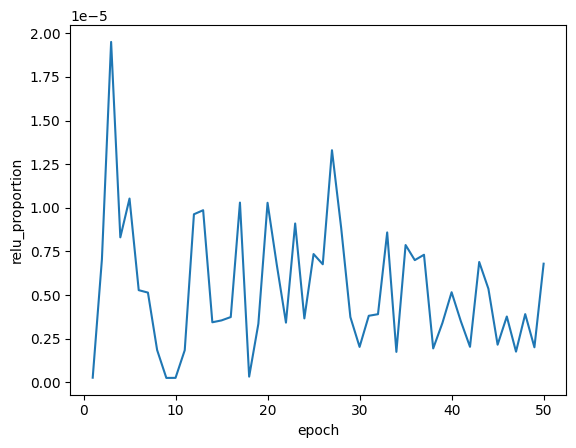

In [28]:
df_train_avg = df_count_train.groupby("epoch").mean()
sns.lineplot(data=df_train_avg, x="epoch", y="relu_proportion")

## Eficiência do Modelo

In [29]:
print(f"Acurácia (teste) média: {round(100*df_count_test['val_acc'].mean(), 2)}%")

Acurácia (teste) média: 89.74%


<Axes: xlabel='epoch', ylabel='train_loss'>

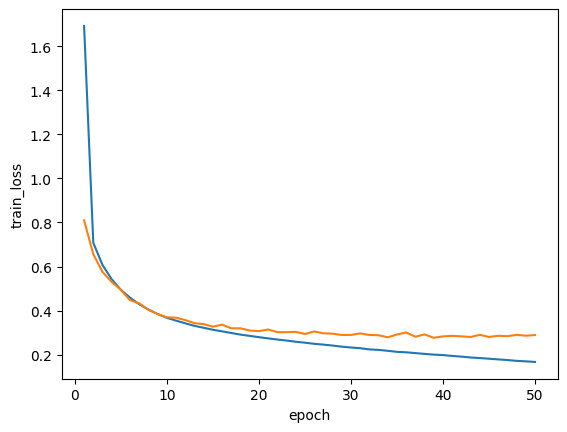

In [30]:
sns.lineplot(data=df_train_avg, x="epoch", y="train_loss")
sns.lineplot(data=df_train_avg, x="epoch", y="val_loss")

In [31]:
df_train_sum = df_count_train.groupby("execution").sum()
seconds_avg = round(df_train_sum["time"].mean())
minutes_avg = seconds_avg // 60
seconds_avg = seconds_avg % 60
print(f"Tempo médio de treino: {minutes_avg}:{seconds_avg}")

Tempo médio de treino: 13:22


## Comparando com funções diferenciáveis

In [32]:
df_train_avg_diff = df_diff_train.groupby("epoch").mean()
df_train_avg_original = df_original_train.groupby("epoch").mean()

Text(0.5, 1.0, 'Tempo por Epoca')

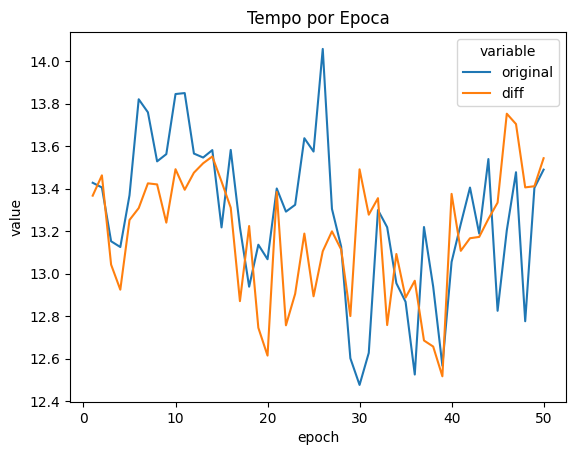

In [33]:
temp = pd.DataFrame()
temp["original"] = df_train_avg_original["time"]
temp["diff"] = df_train_avg_diff["time"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
ax = sns.lineplot(data=temp, x="epoch", y="value", hue="variable")
ax.set_title("Tempo por Epoca")

In [34]:
# tempo total de treino
time_original = round(df_train_avg_original["time"].sum())
time_diff = round(df_train_avg_diff["time"].sum())

print(f"Tempo total de treino (não diff): {time_original//60:02}:{time_original%60:02}")
print(f"Tempo total de treino (diff): {time_diff//60:02}:{time_diff%60:02}")
print(f"Diferença: {round(100*(time_diff - time_original) / time_original, 2)}%")

Tempo total de treino (não diff): 11:03
Tempo total de treino (diff): 10:59
Diferença: -0.6%


Text(0.5, 1.0, 'Loss (Treino) por Epoca')

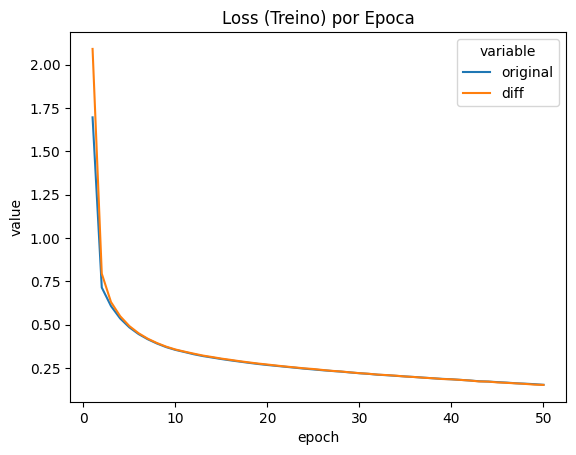

In [35]:
temp = pd.DataFrame()
temp["original"] = df_train_avg_original["train_loss"]
temp["diff"] = df_train_avg_diff["train_loss"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
ax = sns.lineplot(data=temp, x="epoch", y="value", hue="variable")
ax.set_title("Loss (Treino) por Epoca")

Text(0.5, 1.0, 'Loss (Validacao) por Epoca')

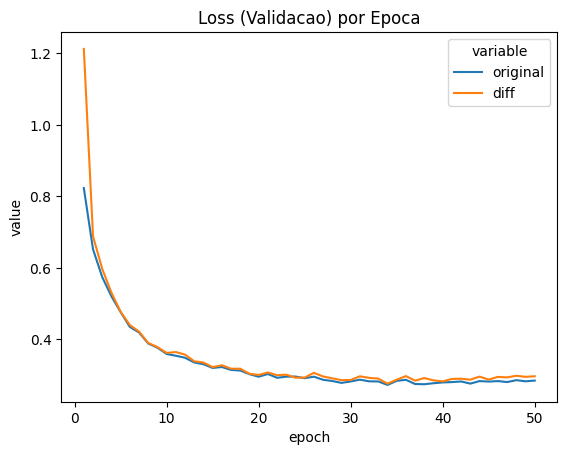

In [36]:
temp = pd.DataFrame()
temp["original"] = df_train_avg_original["val_loss"]
temp["diff"] = df_train_avg_diff["val_loss"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
ax = sns.lineplot(data=temp, x="epoch", y="value", hue="variable")
ax.set_title("Loss (Validacao) por Epoca")

Text(0.5, 1.0, 'Acurácia (Validacao) por Epoca')

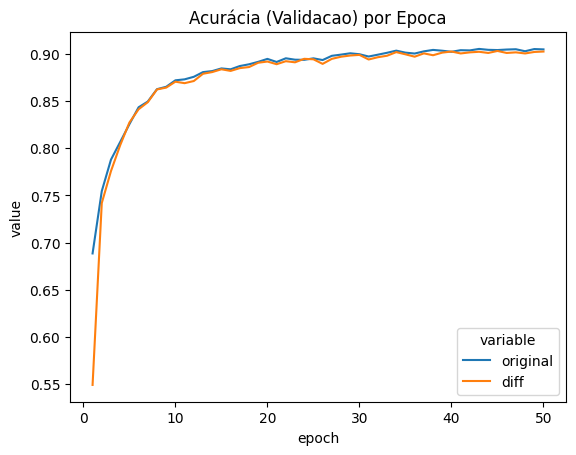

In [37]:
temp = pd.DataFrame()
temp["original"] = df_train_avg_original["val_acc"]
temp["diff"] = df_train_avg_diff["val_acc"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
ax = sns.lineplot(data=temp, x="epoch", y="value", hue="variable")
ax.set_title("Acurácia (Validacao) por Epoca")

In [38]:
# melhor época original
df_train_avg_original[df_train_avg_original["val_loss"] == df_train_avg_original["val_loss"].min()]

,execution,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call,relu_proportion
epoch,,,,,,,,
34,3.0,0.205171,0.272378,0.9032,12.954818,0.0,0.0,NaN


In [39]:
# melhor época diff
df_train_avg_diff[df_train_avg_diff["val_loss"] == df_train_avg_diff["val_loss"].min()]

,execution,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call,relu_proportion
epoch,,,,,,,,
34,3.0,0.206024,0.275912,0.901644,13.092342,0.0,0.0,NaN


In [40]:
# tempo para chegar na melhor época
epoch_original = df_train_avg_original[df_train_avg_original["val_loss"] == df_train_avg_original["val_loss"].min()].index[0]
epoch_diff = df_train_avg_diff[df_train_avg_diff["val_loss"] == df_train_avg_diff["val_loss"].min()].index[0]

time_original = round(df_train_avg_original.head(epoch_original)["time"].sum())
time_diff = round(df_train_avg_diff.head(epoch_diff)["time"].sum())

print(f"Tempo de treino até melhor época (não diff): {time_original//60:02}:{time_original%60:02}")
print(f"Tempo de treino até melhor época (diff): {time_diff//60:02}:{time_diff%60:02}")
print(f"Diferença: {round(100*(time_diff - time_original) / time_original, 2)}%")

Tempo de treino até melhor época (não diff): 07:34
Tempo de treino até melhor época (diff): 07:28
Diferença: -1.32%


## Tempo de Previsão

In [44]:
time_original = df_original_test["time"].mean()
time_diff = df_diff_test["time"].mean()
time_original, time_diff, (time_diff - time_original) / time_original

(1.6681442260742188, 1.719432783126831, 0.030745876915759165)

In [43]:
df_diff_test

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
50,1,-1,NaN,0.314305,0.8931,1.777069,0,0
101,2,-1,NaN,0.321540,0.8991,1.668121,0,0
152,3,-1,NaN,0.318394,0.8961,1.664264,0,0
203,4,-1,NaN,0.303469,0.9003,1.817251,0,0
254,5,-1,NaN,0.293898,0.9006,1.670459,0,0
